In [1]:
import platform

In [2]:
print(platform.python_version())

3.12.9


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from collections import Counter

In [3]:
df = pd.read_csv('data/creditcard.csv')

In [5]:
# fast EDA of data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [7]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [4]:
df = df.drop_duplicates()

In [8]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [10]:
for col in df.columns:
    print(f'Classes of {col}:\t' + str('many...' if len(df[col].unique()) > 1_000 else df[col].unique()))

Classes of Time:	many...
Classes of V1:	many...
Classes of V2:	many...
Classes of V3:	many...
Classes of V4:	many...
Classes of V5:	many...
Classes of V6:	many...
Classes of V7:	many...
Classes of V8:	many...
Classes of V9:	many...
Classes of V10:	many...
Classes of V11:	many...
Classes of V12:	many...
Classes of V13:	many...
Classes of V14:	many...
Classes of V15:	many...
Classes of V16:	many...
Classes of V17:	many...
Classes of V18:	many...
Classes of V19:	many...
Classes of V20:	many...
Classes of V21:	many...
Classes of V22:	many...
Classes of V23:	many...
Classes of V24:	many...
Classes of V25:	many...
Classes of V26:	many...
Classes of V27:	many...
Classes of V28:	many...
Classes of Amount:	many...
Classes of Class:	[0 1]


In [5]:
df = (df - df.min()) / (df.max() - df.min())

In [12]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,...,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0.0
1,0.000000,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,...,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0.0
2,0.000006,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,...,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0.0
3,0.000006,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,...,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,0.0
4,0.000012,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,...,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.999965,0.756448,0.873531,0.666991,0.160317,0.729603,0.236810,0.235393,0.863749,0.528729,...,0.564920,0.515249,0.680500,0.313600,0.658558,0.466291,0.433929,0.329840,0.000030,0.0
284803,0.999971,0.945845,0.766677,0.872678,0.219189,0.771561,0.273661,0.265504,0.788548,0.482925,...,0.564933,0.553153,0.665619,0.245298,0.543855,0.360884,0.417775,0.312038,0.000965,0.0
284804,0.999977,0.990905,0.764080,0.781102,0.227202,0.783425,0.293496,0.263547,0.792985,0.477677,...,0.565220,0.537005,0.664877,0.468492,0.592824,0.411177,0.416593,0.312585,0.002642,0.0
284805,0.999977,0.954209,0.772856,0.849587,0.282508,0.763172,0.269291,0.261175,0.792671,0.476287,...,0.565755,0.547353,0.663008,0.398836,0.545958,0.514746,0.418520,0.315245,0.000389,0.0


In [13]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,0.548701,0.958394,0.767215,0.837442,0.251799,0.765729,0.263008,0.265366,0.785376,0.462725,...,0.561474,0.510030,0.665437,0.382263,0.577894,0.425473,0.416543,0.313135,0.003444,0.001667
std,0.274787,0.033095,0.017375,0.026143,0.062690,0.009270,0.013391,0.007479,0.012648,0.037738,...,0.011670,0.033800,0.009263,0.081608,0.029257,0.078742,0.007305,0.006657,0.009747,0.040796
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.313699,0.942733,0.760924,0.821997,0.214244,0.761072,0.255288,0.261990,0.783145,0.440588,...,0.557799,0.484714,0.663032,0.334472,0.560085,0.372072,0.415207,0.312052,0.000218,0.000000
50%,0.490141,0.958640,0.767933,0.840532,0.250944,0.765356,0.260253,0.265604,0.785620,0.460968,...,0.561005,0.510342,0.665268,0.387761,0.578820,0.416926,0.416538,0.313353,0.000856,0.000000
75%,0.806160,0.980652,0.775703,0.855209,0.284718,0.769838,0.267009,0.268831,0.788879,0.483310,...,0.564481,0.534674,0.667628,0.441489,0.597590,0.464695,0.418194,0.314712,0.003017,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
# check important Feature

   feature  importance
0      V14    0.187446
1      V10    0.120338
2       V4    0.099725
3      V12    0.097699
4      V17    0.092372
5       V3    0.080116
6      V11    0.041582
7       V2    0.040876
8      V16    0.038749
9       V7    0.025271
10      V9    0.024737
11     V21    0.016291
12     V18    0.012293
13     V19    0.012073
14      V1    0.009971
15      V8    0.009636
16     V20    0.009027
17  Amount    0.008831
18     V27    0.008083
19      V5    0.007727
20      V6    0.007707
21     V26    0.007254
22     V13    0.006578
23     V15    0.006162
24     V22    0.005360
25     V25    0.005239
26     V23    0.004913
27     V28    0.004801
28     V24    0.004638
29    Time    0.004506


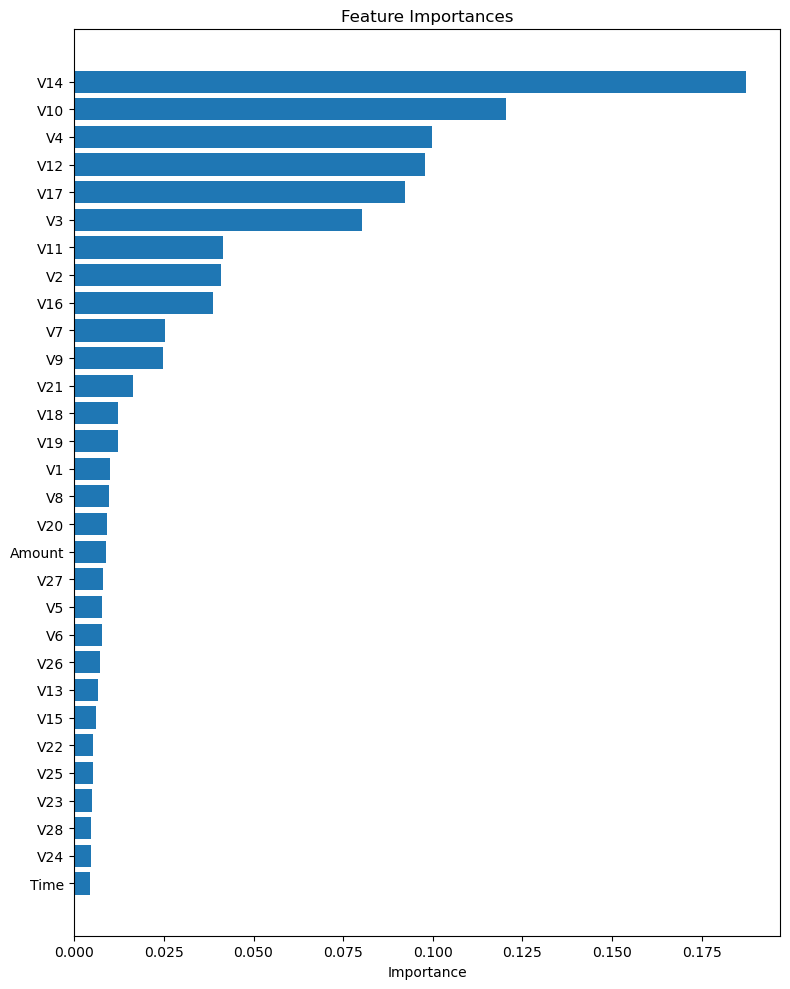

In [6]:
X = df.drop(columns=['Class'])
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    stratify=y,
    random_state=42
)

clf = RandomForestClassifier(
    n_estimators=100,
    n_jobs=-1,
    random_state=42,
    class_weight='balanced'
)
clf.fit(X_train, y_train)

importances = clf.feature_importances_
feat_imp = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
})
feat_imp = feat_imp.sort_values('importance', ascending=False).reset_index(drop=True)

print(feat_imp)

plt.figure(figsize=(8, 10))
plt.barh(feat_imp['feature'], feat_imp['importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

In [16]:
feat_imp

,feature,importance
0,V14,0.187446
1,V10,0.120338
2,V4,0.099725
3,V12,0.097699
4,V17,0.092372
5,V3,0.080116
6,V11,0.041582
7,V2,0.040876
8,V16,0.038749
9,V7,0.025271


In [7]:
features = feat_imp['feature'][:6].to_list()
features_with_class =  features + ['Class']
print(features)
print(features_with_class)

['V14', 'V10', 'V4', 'V12', 'V17', 'V3']
['V14', 'V10', 'V4', 'V12', 'V17', 'V3', 'Class']


In [8]:
df = df[features_with_class].copy(deep=True)

In [12]:
df.describe()

,V14,V10,V4,V12,V17,V3,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,0.646062,0.508692,0.251799,0.704166,0.731135,0.837442,0.001667
std,0.032017,0.022270,0.062690,0.037489,0.024480,0.026143,0.040796
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.631739,0.497641,0.214244,0.688883,0.717069,0.821997,0.000000
50%,0.647741,0.506793,0.250944,0.709434,0.729216,0.840532,0.000000
75%,0.662607,0.518107,0.284718,0.727447,0.742722,0.855209,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
df['Class'].unique()

array([0., 1.])

In [21]:
df['Class'].value_counts()

Class
0.0    283253
1.0       473
Name: count, dtype: int64

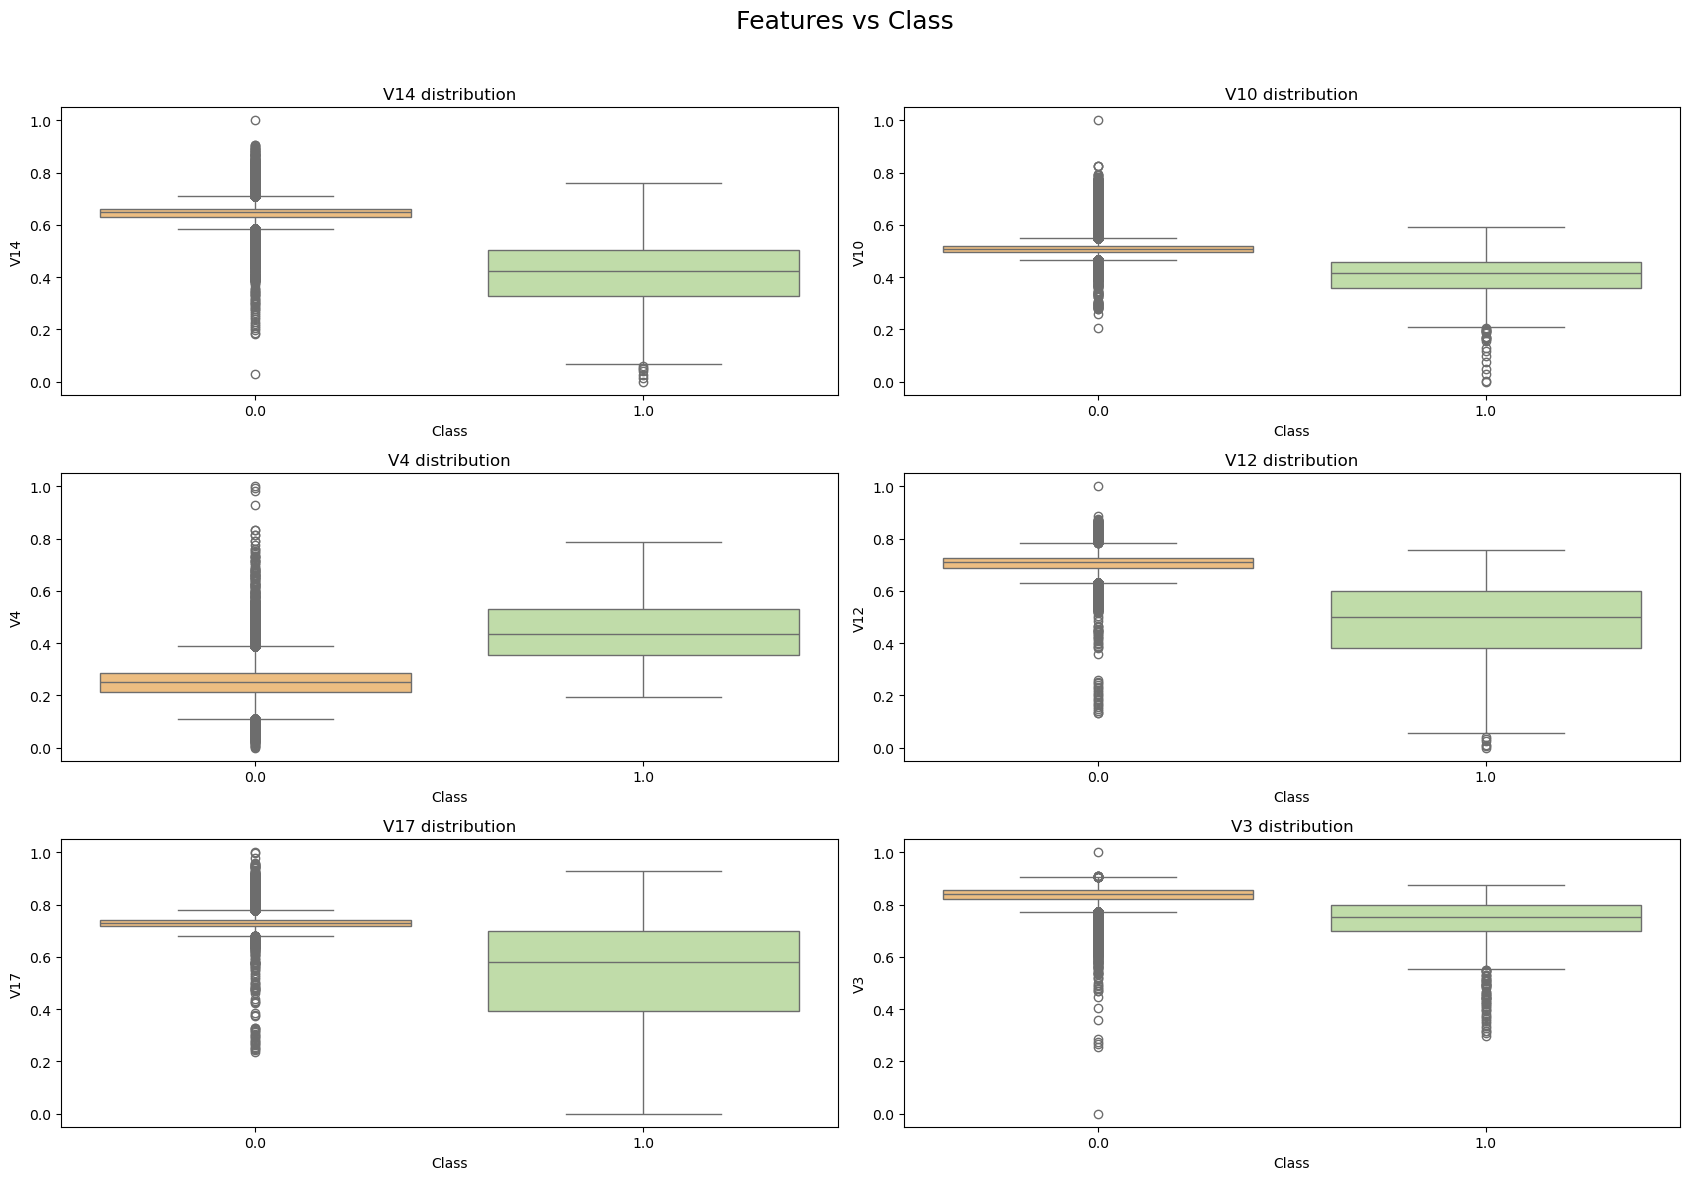

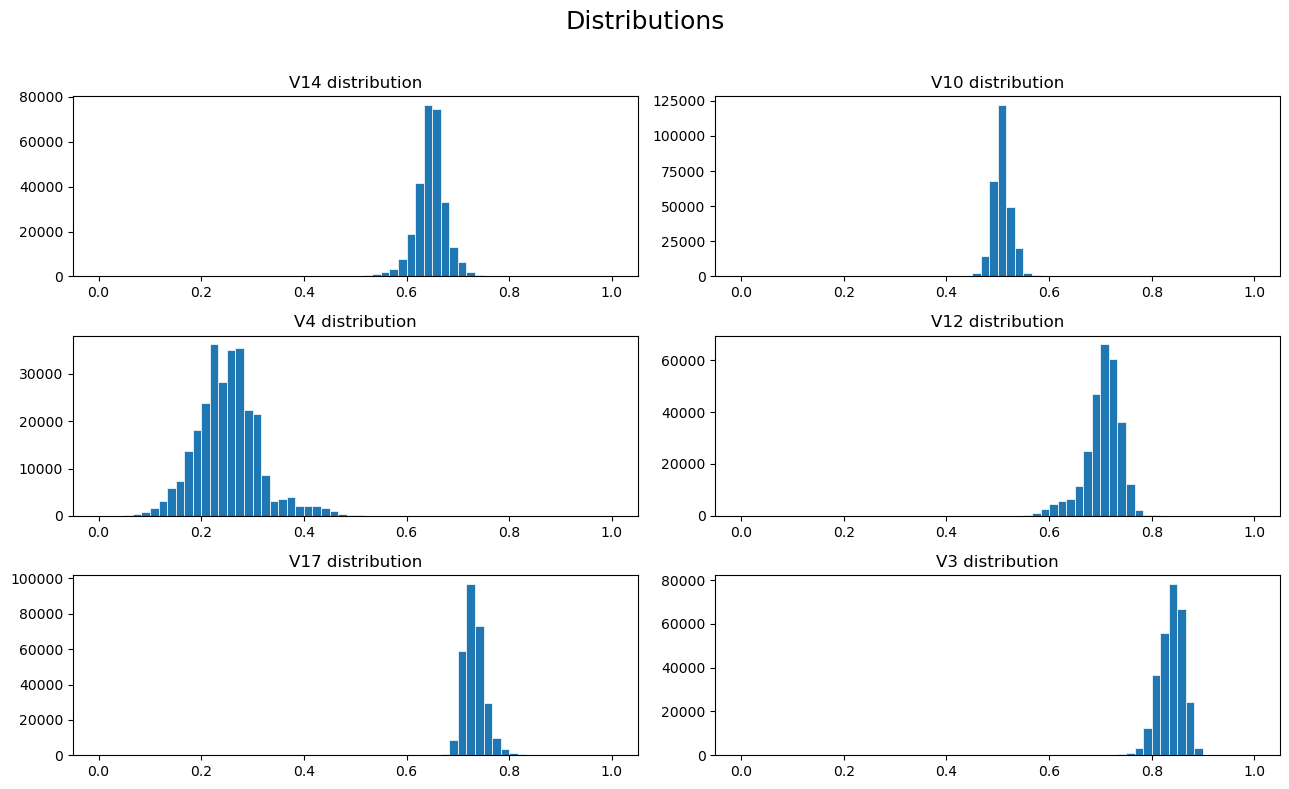

In [22]:
fig, axes = plt.subplots(3,2, figsize=(17, 12))
fig.suptitle('Features vs Class', size=18)

for ax, feat in zip(axes.flatten(), features):
    sns.boxplot(
        ax=ax,
        data=df,
        x='Class',
        y=feat,
        hue='Class',
        palette='Spectral',
        dodge=False
    )
    ax.set_title(f"{feat} distribution")
    ax.get_legend().remove()

plt.tight_layout(rect=[0, 0, 1, 0.96])

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(13, 8))
fig.suptitle('Distributions\n', size=18)

for ax, feat in zip(axes.flatten(), features):
    ax.hist(df[feat], bins=60, linewidth=0.5, edgecolor='white')
    ax.set_title(f"{feat} distribution")

plt.tight_layout()

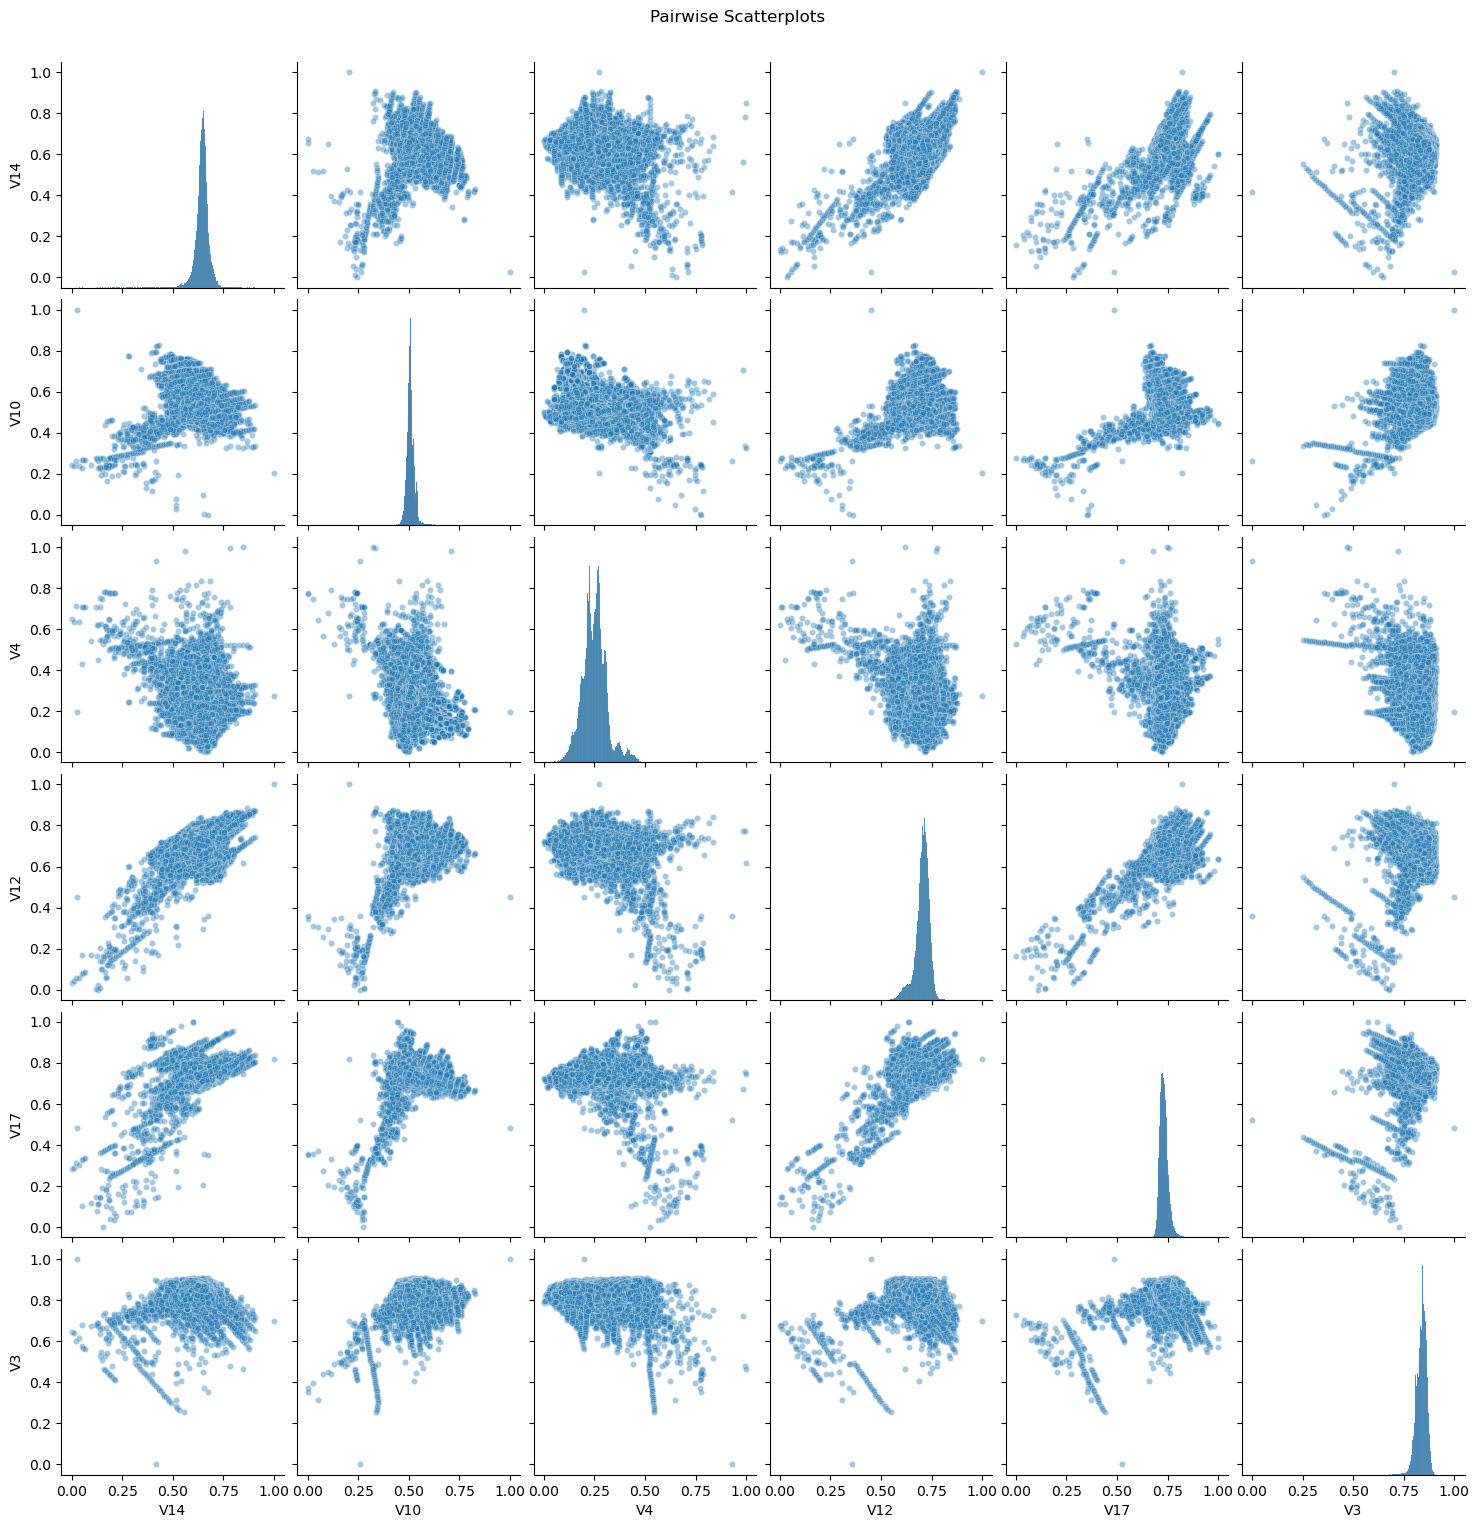

In [23]:
sns.pairplot(df[features], diag_kind='hist', plot_kws={'alpha':0.4, 's':20})
plt.suptitle('Pairwise Scatterplots', y=1.02)
plt.show()

In [12]:
def IQR_method(df, n, features, k=1.5):
    """
    Takes a dataframe and returns an index list corresponding to the observations
    containing more than n outliers according to the Tukey IQR method.
    """
    outlier_list = []

    for column in features:

        # 1st quartile (25%)
        Q1 = np.percentile(df[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[column],75)

        # Interquartile range (IQR)
        IQR = Q3 - Q1

        # outlier step
        outlier_step = k * IQR

        # Determining a list of indices of outliers
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index

        # appending the list of outliers
        outlier_list.extend(outlier_list_column)

    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )

    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] < Q1 - outlier_step]
    df2 = df[df[column] > Q3 + outlier_step]

    print('Total number of outliers is:', df1.shape[0]+df2.shape[0])

    return multiple_outliers

In [25]:
# perfect results

In [13]:
# Detect anomalies via IQR method
outlier_indices = IQR_method(df, n=1, features=features_with_class, k=4.5)

# # Prepare a plotting DataFrame with an 'anomaly' flag
df_out = df[features].copy()
df_out['anomaly'] = 'normal'
df_out.loc[outlier_indices, 'anomaly'] = 'outlier'

Total number of outliers is: 473


In [30]:
%matplotlib inline

In [32]:
# TODO too long work

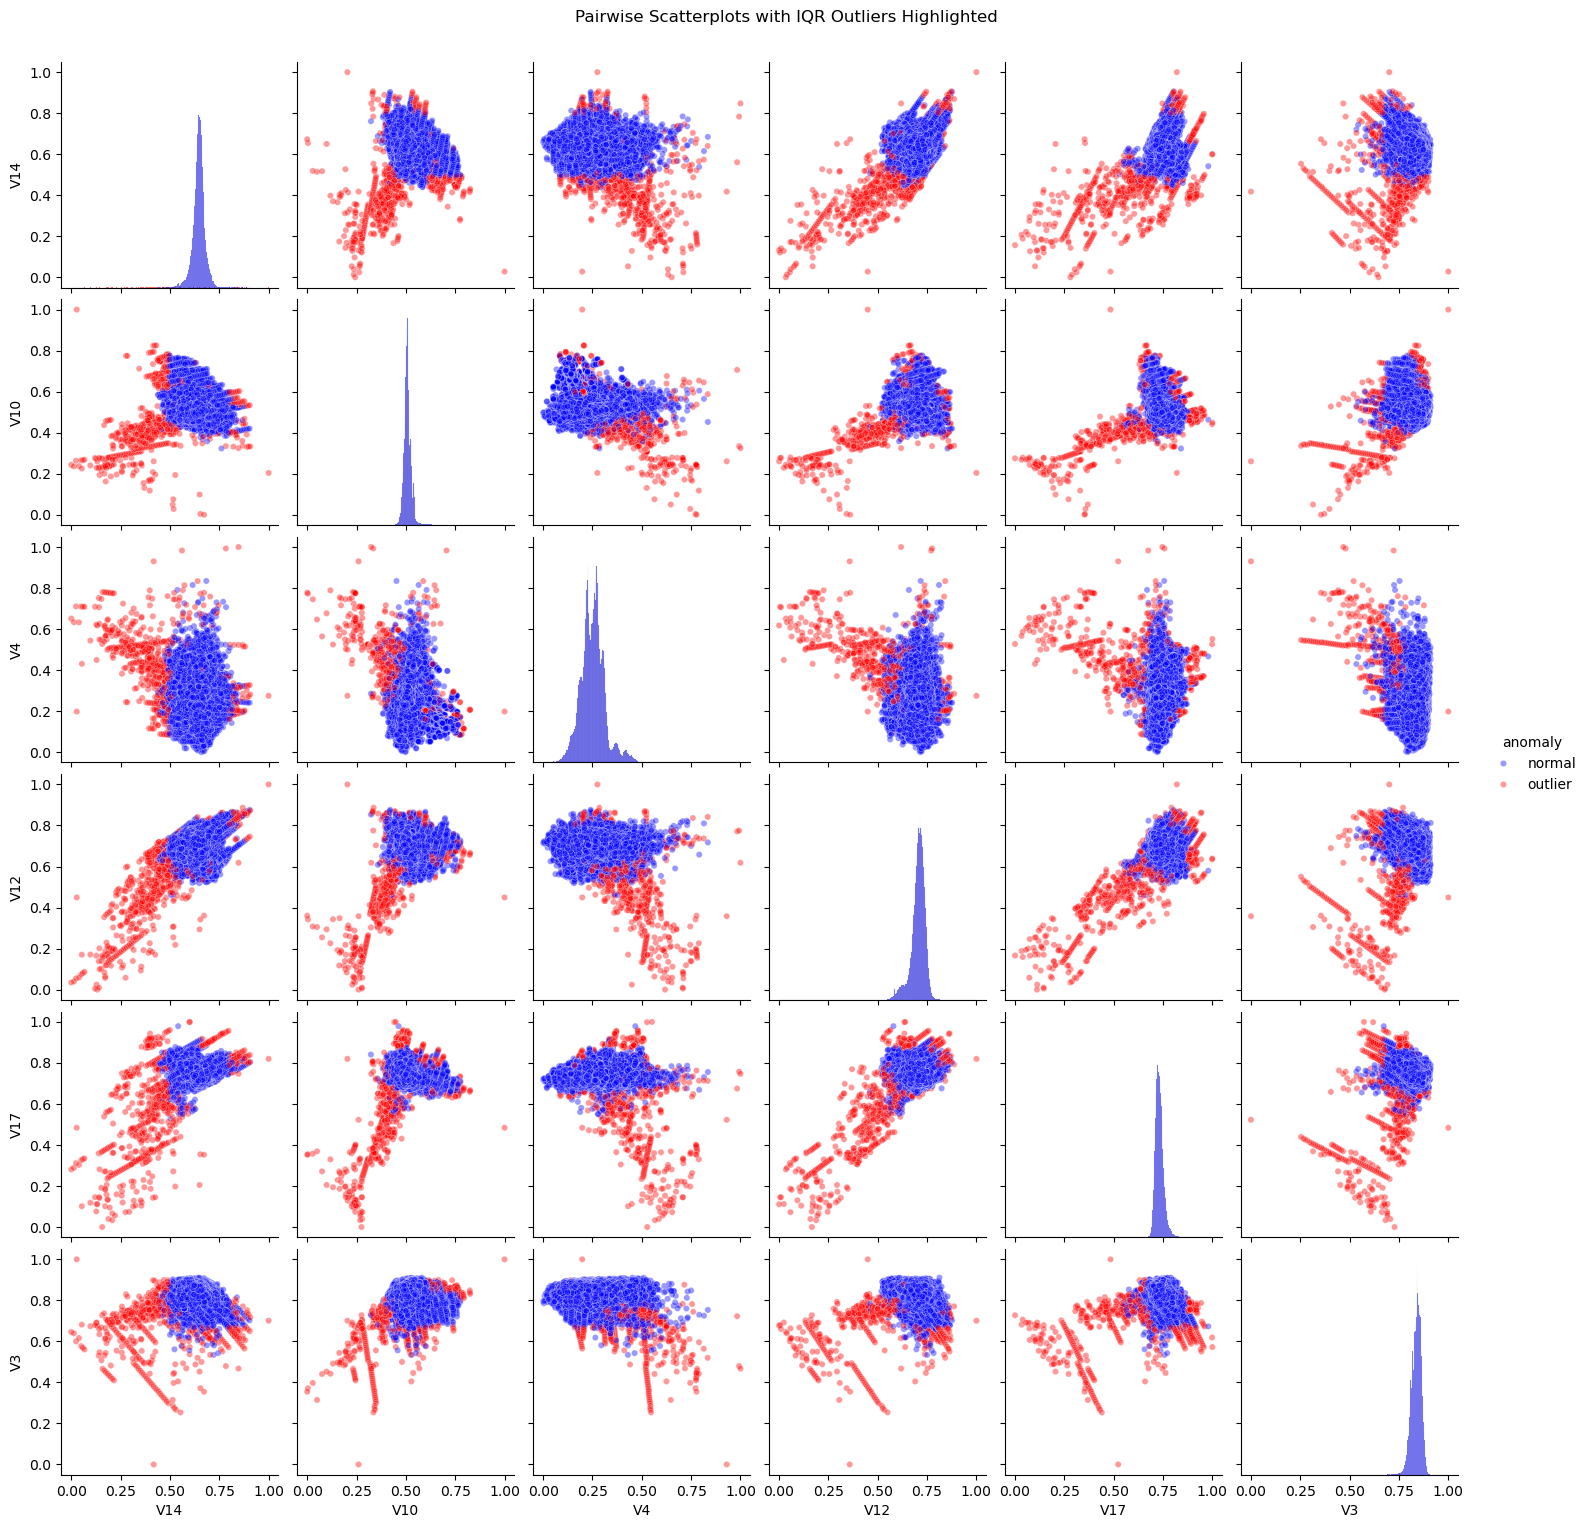

In [31]:
sns.pairplot(
    df_out,
    vars=features,
    hue='anomaly',
    palette={'normal': 'blue', 'outlier': 'red'},
    diag_kind='hist',
    plot_kws={'alpha': 0.4, 's': 20}
)
plt.suptitle('Pairwise Scatterplots with IQR Outliers Highlighted', y=1.02)
plt.show()

In [14]:
df_out

,V14,V10,V4,V12,V17,V3,anomaly
0,0.635591,0.510600,0.313023,0.680908,0.737173,0.881365,normal
1,0.641219,0.505267,0.271796,0.744342,0.727794,0.840298,normal
2,0.640473,0.513018,0.268766,0.706683,0.763381,0.868141,normal
3,0.636372,0.507585,0.213661,0.710910,0.711253,0.868484,normal
4,0.608406,0.524303,0.269796,0.724477,0.724243,0.864251,normal
...,...,...,...,...,...,...,...
284802,0.801627,0.598850,0.160317,0.806406,0.789000,0.666991,outlier
284803,0.623352,0.488530,0.219189,0.738709,0.730383,0.872678,normal
284804,0.628885,0.498692,0.227202,0.706572,0.740239,0.781102,normal
284805,0.661171,0.500464,0.282508,0.667901,0.745946,0.849587,normal


In [34]:
df_out.loc[df_out['anomaly'] == 'outlier']

,V14,V10,V4,V12,V17,V3,anomaly
225,0.424918,0.638787,0.267925,0.676777,0.795093,0.796510,outlier
362,0.481610,0.689497,0.182588,0.654836,0.660352,0.883324,outlier
601,0.489895,0.691241,0.182044,0.661279,0.664997,0.875167,outlier
1086,0.433180,0.640546,0.267181,0.683190,0.799741,0.788462,outlier
1830,0.441442,0.642305,0.266437,0.689602,0.804388,0.780415,outlier
...,...,...,...,...,...,...,...
282863,0.835385,0.599075,0.202695,0.833861,0.824524,0.631076,outlier
282881,0.843649,0.600825,0.202003,0.840276,0.829167,0.622986,outlier
282903,0.851912,0.602576,0.201312,0.846691,0.833811,0.614896,outlier
284249,0.664139,0.347830,0.411161,0.534592,0.719445,0.556105,outlier


In [45]:
# why i did it?

In [35]:
anomaly_ids = list(df_out.loc[df_out['anomaly'] == 'outlier'].index.values)

In [47]:
anomaly_ids

[np.int64(225),
 np.int64(362),
 np.int64(601),
 np.int64(1086),
 np.int64(1830),
 np.int64(2016),
 np.int64(3602),
 np.int64(4895),
 np.int64(4920),
 np.int64(5827),
 np.int64(6108),
 np.int64(6329),
 np.int64(6331),
 np.int64(6334),
 np.int64(6336),
 np.int64(6338),
 np.int64(6427),
 np.int64(6446),
 np.int64(6472),
 np.int64(6529),
 np.int64(6609),
 np.int64(6641),
 np.int64(6717),
 np.int64(6719),
 np.int64(6734),
 np.int64(6774),
 np.int64(6820),
 np.int64(6870),
 np.int64(6882),
 np.int64(6899),
 np.int64(6903),
 np.int64(6971),
 np.int64(7080),
 np.int64(7081),
 np.int64(7090),
 np.int64(7744),
 np.int64(8296),
 np.int64(8312),
 np.int64(8335),
 np.int64(8464),
 np.int64(8610),
 np.int64(8615),
 np.int64(8617),
 np.int64(8625),
 np.int64(8842),
 np.int64(8845),
 np.int64(8972),
 np.int64(9035),
 np.int64(9044),
 np.int64(9179),
 np.int64(9252),
 np.int64(9258),
 np.int64(9487),
 np.int64(9489),
 np.int64(9509),
 np.int64(9512),
 np.int64(10204),
 np.int64(10456),
 np.int64(10568

In [46]:
df_out.loc[anomaly_ids]

,V14,V10,V4,V12,V17,V3,anomaly
225,0.424918,0.638787,0.267925,0.676777,0.795093,0.796510,outlier
362,0.481610,0.689497,0.182588,0.654836,0.660352,0.883324,outlier
601,0.489895,0.691241,0.182044,0.661279,0.664997,0.875167,outlier
1086,0.433180,0.640546,0.267181,0.683190,0.799741,0.788462,outlier
1830,0.441442,0.642305,0.266437,0.689602,0.804388,0.780415,outlier
...,...,...,...,...,...,...,...
282863,0.835385,0.599075,0.202695,0.833861,0.824524,0.631076,outlier
282881,0.843649,0.600825,0.202003,0.840276,0.829167,0.622986,outlier
282903,0.851912,0.602576,0.201312,0.846691,0.833811,0.614896,outlier
284249,0.664139,0.347830,0.411161,0.534592,0.719445,0.556105,outlier


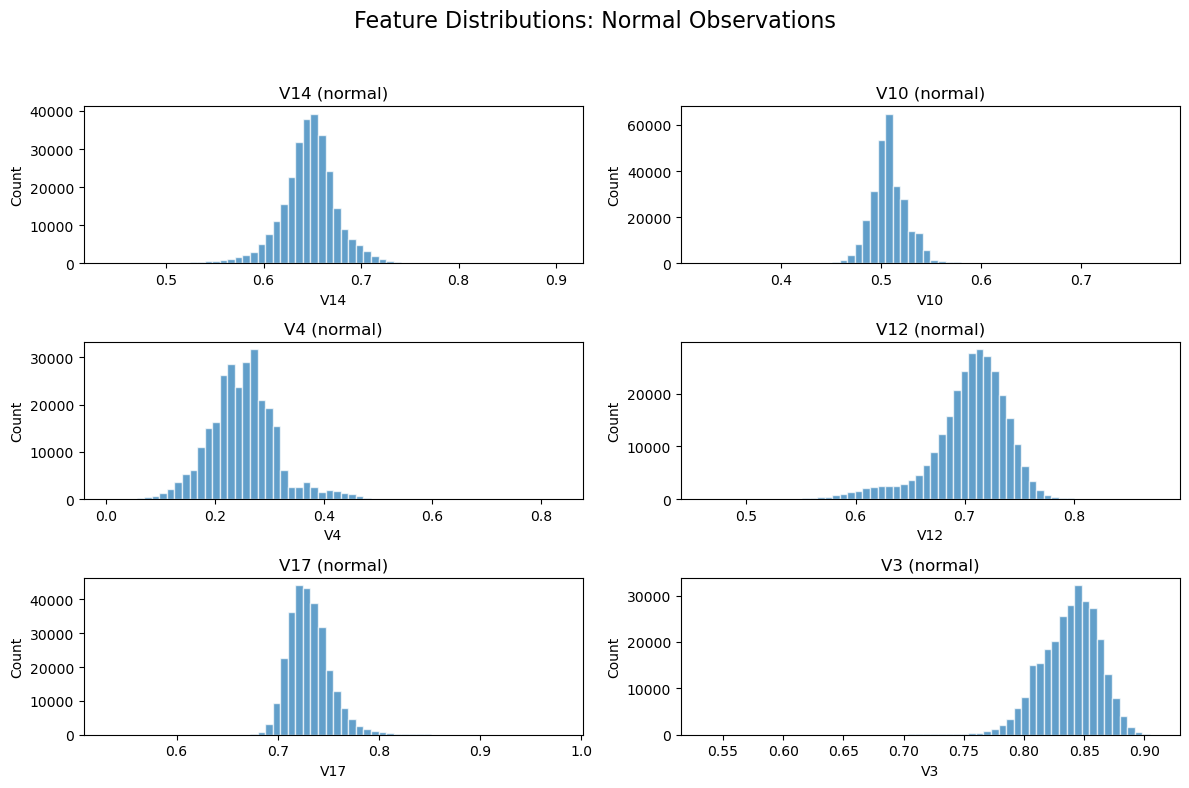

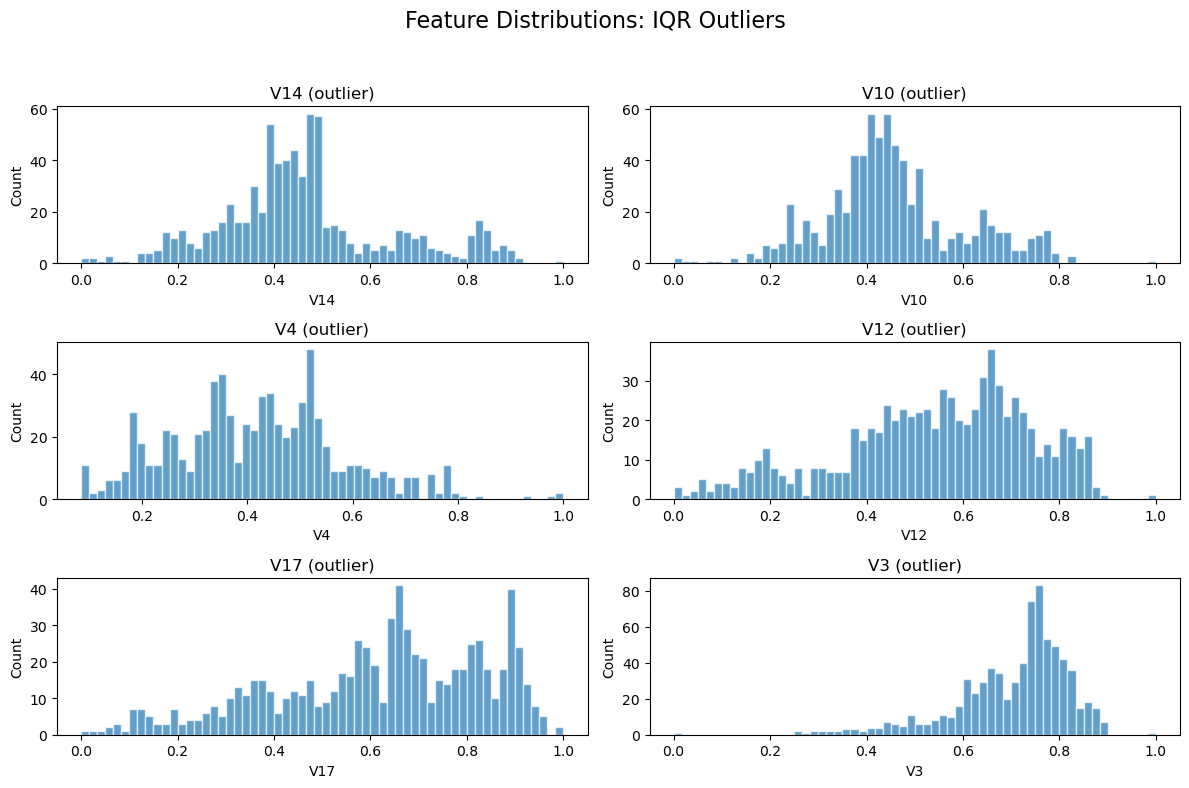

In [48]:
df_norm = df_out[df_out['anomaly'] == 'normal']
df_outlier  = df_out[df_out['anomaly'] == 'outlier']

fig1, axes1 = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))
fig1.suptitle('Feature Distributions: Normal Observations', size=16)

for ax, feat in zip(axes1.flatten(), features):
    ax.hist(
        df_norm[feat],
        bins=60,
        alpha=0.7,
        edgecolor='white'
    )
    ax.set_title(f"{feat} (normal)")
    ax.set_xlabel(feat)
    ax.set_ylabel("Count")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


fig2, axes2 = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))
fig2.suptitle('Feature Distributions: IQR Outliers', size=16)

for ax, feat in zip(axes2.flatten(), features):
    ax.hist(
        df_outlier[feat],
        bins=60,
        alpha=0.7,
        edgecolor='white'
    )
    ax.set_title(f"{feat} (outlier)")
    ax.set_xlabel(feat)
    ax.set_ylabel("Count")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [49]:
# Evaluate how well IQR outliers correspond to actual frauds
# Treat IQR outlier=1 as "predicted fraud", normal=0 as "predicted non‑fraud"
df_out['pred_iqr'] = 0
df_out.loc[outlier_indices, 'pred_iqr'] = 1

y_true = df['Class']
y_pred = df_out['pred_iqr']

print("=== IQR Outlier Detection vs. True Fraud Labels ===")
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=['non‑fraud','fraud']))

cm = confusion_matrix(y_true, y_pred)
cm_df_out = pd.DataFrame(cm,
                     index=['true_non‑fraud','true_fraud'],
                     columns=['pred_non‑fraud','pred_fraud'])
print("\nConfusion Matrix:")
print(cm_df_out)

=== IQR Outlier Detection vs. True Fraud Labels ===

Classification Report:
              precision    recall  f1-score   support

   non‑fraud       1.00      1.00      1.00    283253
       fraud       0.51      0.82      0.63       473

    accuracy                           1.00    283726
   macro avg       0.76      0.91      0.82    283726
weighted avg       1.00      1.00      1.00    283726


Confusion Matrix:
                pred_non‑fraud  pred_fraud
true_non‑fraud          282889         364
true_fraud                  87         386


In [ ]:
# some better then in example

In [50]:
outlier_fraction = len(df[df['Class'] == 1])/float(len(df[df['Class'] == 0]))
outlier_fraction

0.0016698852262818046

__EllipticEnvelope__

In [9]:
from sklearn.covariance import EllipticEnvelope
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [56]:
df_out.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   V14       283726 non-null  float64
 1   V10       283726 non-null  float64
 2   V4        283726 non-null  float64
 3   V12       283726 non-null  float64
 4   V17       283726 non-null  float64
 5   V3        283726 non-null  float64
 6   anomaly   283726 non-null  object 
 7   pred_iqr  283726 non-null  int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 27.5+ MB


In [ ]:
df_pr = df_out.drop(columns=['anomaly', 'pred_iqr'])
algorithm = EllipticEnvelope(random_state=2021).fit(df_pr)
y_pred = algorithm.predict(df_pr)
y_pred

In [64]:
np.unique(y_pred)

array([-1,  1])

In [66]:
len(y_pred)

283726

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V14     283726 non-null  float64
 1   V10     283726 non-null  float64
 2   V4      283726 non-null  float64
 3   V12     283726 non-null  float64
 4   V17     283726 non-null  float64
 5   V3      283726 non-null  float64
 6   Class   283726 non-null  float64
dtypes: float64(7)
memory usage: 25.4 MB


In [91]:
y_true = list()

for x in df['Class']:
    y_true.append(-1 if x == 1.0 else 1)

In [16]:
np.unique(y_true, return_counts=True)

(array([-1,  1]), array([   473, 283253]))

In [93]:
print("Accuracy:", accuracy_score(y_true, y_pred))
print("\nClassification Report:\n", classification_report(y_true, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))

Accuracy: 0.901390778427074

Classification Report:
               precision    recall  f1-score   support

          -1       0.02      0.92      0.03       473
           1       1.00      0.90      0.95    283253

    accuracy                           0.90    283726
   macro avg       0.51      0.91      0.49    283726
weighted avg       1.00      0.90      0.95    283726


Confusion Matrix:
 [[   434     39]
 [ 27939 255314]]


__IsolationForest__

In [94]:
from sklearn.ensemble import IsolationForest

In [95]:
clf = IsolationForest(contamination=0.1, random_state=42)
clf.fit(df_pr)

y_pred = clf.predict(df_pr)

In [96]:
np.unique(y_pred)

array([-1,  1])

In [17]:
y_true = list()

for x in df['Class']:
    y_true.append(-1 if x == 1.0 else 1)

In [98]:
print("Accuracy:", accuracy_score(y_true, y_pred))
print("\nClassification Report:\n", classification_report(y_true, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))

Accuracy: 0.901369631263966

Classification Report:
               precision    recall  f1-score   support

          -1       0.02      0.91      0.03       473
           1       1.00      0.90      0.95    283253

    accuracy                           0.90    283726
   macro avg       0.51      0.91      0.49    283726
weighted avg       1.00      0.90      0.95    283726


Confusion Matrix:
 [[   431     42]
 [ 27942 255311]]


In [100]:
from sklearn.neighbors import LocalOutlierFactor

In [104]:
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(df_pr)

/opt/miniconda3/envs/ds/lib/python3.12/site-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(


In [105]:
print("Accuracy:", accuracy_score(y_true, y_pred))
print("\nClassification Report:\n", classification_report(y_true, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))

Accuracy: 0.8986698434405025

Classification Report:
               precision    recall  f1-score   support

          -1       0.00      0.10      0.00       473
           1       1.00      0.90      0.95    283253

    accuracy                           0.90    283726
   macro avg       0.50      0.50      0.47    283726
weighted avg       1.00      0.90      0.95    283726


Confusion Matrix:
 [[    48    425]
 [ 28325 254928]]


In [14]:
from sklearn.cluster import DBSCAN

In [14]:
df_pr = df_out.drop(columns=['anomaly'])

In [ ]:
dbscan = DBSCAN(eps=0.1, min_samples=5, metric='euclidean', algorithm='ball_tree')
labels = dbscan.fit_predict(df_pr)

__DBSCAN dont work with 16gb RAM XD__

__OneClassSVM__

In [10]:
from sklearn.svm import OneClassSVM

In [15]:
model = OneClassSVM(kernel="rbf", gamma='auto', nu=0.1)
model.fit(df_pr)

OneClassSVM(gamma='auto', nu=0.1)

In [16]:
y_pred = model.predict(df_pr)

In [18]:
print("Accuracy:", accuracy_score(y_true, y_pred))
print("\nClassification Report:\n", classification_report(y_true, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))

Accuracy: 0.9013238124105651

Classification Report:
               precision    recall  f1-score   support

          -1       0.01      0.90      0.03       473
           1       1.00      0.90      0.95    283253

    accuracy                           0.90    283726
   macro avg       0.51      0.90      0.49    283726
weighted avg       1.00      0.90      0.95    283726


Confusion Matrix:
 [[   424     49]
 [ 27948 255305]]


__Conclusion__

In [ ]:
Поки я чекав на роботу OneClassSVM, встиг натренувати нейронку з кращими результатами, DBSCAN зайняв 50 гб оперативи та свапу, 
на мою думку IsolationForest та нейрока найкраще себе показали (код нейронки в іншому нотебуку)